In [6]:
#  Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the data to understand the structure
print("Train Data Preview:")
display(train_data.head())

print("\nTest Data Preview:")
display(test_data.head())


Train Data Preview:


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415



Test Data Preview:


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [7]:
# Drop 'id' column and 'FloodProbability' from training data, 'id' from test data
X = train_data.drop(columns=['FloodProbability', 'id'])
y = train_data['FloodProbability']

X_test = test_data.drop(columns=['id'])

# Display the first few rows of the processed features
print("Training Features Preview:")
display(X.head())

print("\nTest Features Preview:")
display(X_test.head())


Training Features Preview:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5



Test Features Preview:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [8]:
# Scaling the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Check the scaled features
print("Scaled Training Features (first 5 rows):")
display(X_scaled[:5])

print("\nScaled Test Features (first 5 rows):")
display(X_test_scaled[:5])


Scaled Training Features (first 5 rows):


array([[ 0.03819786,  1.46776894,  0.02156078,  1.49036255,  0.50757824,
        -0.45394109, -0.45888097, -0.93310708, -0.939124  , -0.45563245,
        -1.41724744,  0.02562654, -0.93542106, -0.9293119 ,  0.03407994,
        -0.44842187,  0.99918279,  0.02375436,  0.98956852, -0.92759812],
       [ 0.52448798,  0.99018623, -0.46102151, -0.45925107,  1.46755213,
         1.48993819, -0.93894347,  0.03495146, -0.4556922 ,  0.50437216,
         1.9511494 ,  0.99072279, -1.41414239, -2.37280922, -0.92635319,
         0.03588375, -0.92929437, -0.94303876, -0.45196156, -0.92759812],
       [ 0.52448798,  0.0350208 ,  0.50414306,  1.00295915, -0.93238259,
         1.00396837, -1.89906847,  0.03495146, -0.4556922 ,  0.02436986,
         0.50755076,  0.99072279, -0.93542106,  0.99535121,  0.03407994,
         0.52018937,  1.48130208, -1.42643532, -0.93247159, -0.92759812],
       [-0.93438237, -0.44256191,  0.50414306,  0.02815234, -0.45239565,
         1.48993819, -0.45888097,  1.00301001,  


Scaled Test Features (first 5 rows):


array([[-0.44809225,  0.51260352, -0.94360379,  0.02815234,  0.50757824,
         1.00396837,  1.46136903,  1.00301001,  1.47803496, -0.45563245,
         1.46994985,  0.02562654,  0.97946426,  0.03301966,  0.5142965 ,
        -0.93272749,  0.5170635 , -0.4596422 , -0.45196156,  0.02917986],
       [-0.44809225, -0.44256191, -1.42618608,  1.97776596,  0.02759129,
         0.03202873, -0.45888097,  1.00301001,  0.02773959, -0.45563245,
        -1.41724744, -0.45692159,  0.97946426, -0.44814612,  0.03407994,
        -1.90133874,  0.99918279, -0.4596422 , -0.45196156, -0.92759812],
       [-1.9069626 , -0.92014462,  0.50414306,  0.02815234,  0.98756518,
        -1.42588073, -0.45888097,  0.51898073, -0.4556922 , -1.41563706,
         0.9887503 ,  1.95581905, -1.41414239,  0.03301966,  0.03407994,
        -1.41703312, -0.92929437,  0.50715093,  1.47007855, -0.92759812],
       [-1.42067248, -0.44256191, -0.46102151,  0.51555574, -0.45239565,
         0.03202873, -0.45888097, -0.93310708, -

In [9]:
#Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the datasets to confirm the split
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")


Training set shape: (894365, 20), Validation set shape: (223592, 20)


In [10]:
#  Train the model with limited tree depth( MY pc is hectic!!!!)
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [11]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved to random_forest_model.pkl")


Model saved to random_forest_model.pkl


In [12]:

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation scores
print(f"Cross-validation MSE scores: {-cv_scores}")
print(f"Average 5-Fold CV MSE: {-cv_scores.mean()}")


Cross-validation MSE scores: [0.00160063 0.00159736 0.00160333 0.00160044 0.00159577]
Average 5-Fold CV MSE: 0.001599506875838308


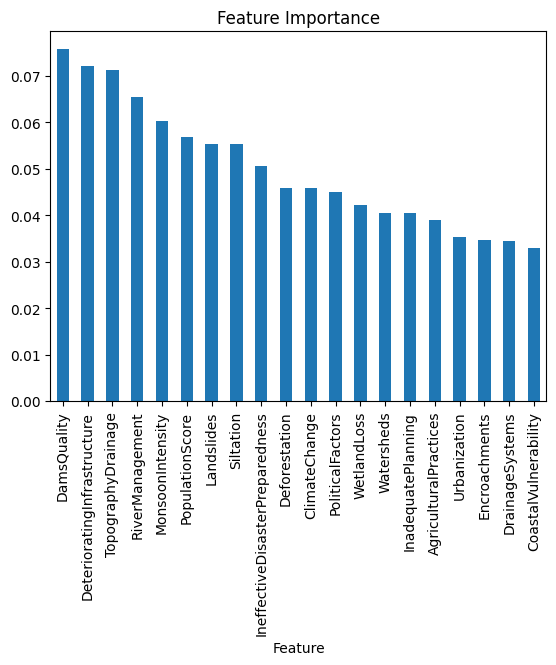

In [13]:
import matplotlib.pyplot as plt
importances = model.feature_importances_

feature_names = X.columns  # Use the column names from the original DataFrame

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot the most important features
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
feature_importances.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance')

# Show the plot
plt.show()

In [14]:
# Validate the model
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {val_mse}")


Validation Mean Squared Error: 0.001608072391137583


In [15]:
# Predict on test data
test_predictions = model.predict(X_test_scaled)

# Check the first few predictions
print("Test Predictions (first 5):")
print(test_predictions[:5])


Test Predictions (first 5):
[0.52272209 0.4756878  0.49119746 0.47800038 0.50961805]


Completed as the predictions are quite good